### Inporting Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from xgboost import XGBRegressor
import joblib

### Exploring the Dataset

In [2]:
df = pd.read_csv('Movie dataset.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.shape

(15509, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


### Checking for Null and Duplicate Values

In [7]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
df.duplicated().sum()

6

In [9]:
df = df.dropna(axis = 0)

In [10]:
df = df.drop_duplicates()

### Data Preprocessing

In [11]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


#### Year Column

In [12]:
df['Year'].unique()

array(['(2019)', '(1997)', '(2005)', '(2012)', '(2014)', '(2004)',
       '(2016)', '(1991)', '(2018)', '(2010)', '(1958)', '(2021)',
       '(2017)', '(2009)', '(1993)', '(2002)', '(2008)', '(1994)',
       '(2007)', '(2003)', '(1998)', '(1979)', '(1974)', '(2015)',
       '(2006)', '(1981)', '(2020)', '(1985)', '(2013)', '(2011)',
       '(1988)', '(1987)', '(1999)', '(1973)', '(1968)', '(1982)',
       '(1977)', '(1950)', '(1969)', '(1948)', '(1990)', '(1989)',
       '(2001)', '(2000)', '(1953)', '(1978)', '(1963)', '(1992)',
       '(1976)', '(1984)', '(1986)', '(1966)', '(1975)', '(1980)',
       '(1967)', '(1970)', '(1952)', '(1972)', '(1971)', '(1964)',
       '(1954)', '(1962)', '(1957)', '(1965)', '(1996)', '(1995)',
       '(1956)', '(1955)', '(1936)', '(1983)', '(1951)', '(1961)',
       '(1959)', '(1949)', '(1960)', '(1946)', '(1940)', '(1945)',
       '(1938)', '(1941)', '(1942)', '(1935)', '(1937)', '(1947)',
       '(1931)', '(1933)', '(1943)', '(1944)', '(1932)', '(193

In [13]:
def extract_year(x):
    return int(x[1:-1])

In [14]:
df['Year'] = df['Year'].apply(extract_year)

#### Duration Column

In [15]:
df['Duration'].unique()

array(['109 min', '110 min', '147 min', '142 min', '82 min', '116 min',
       '96 min', '120 min', '161 min', '166 min', '102 min', '87 min',
       '132 min', '105 min', '146 min', '168 min', '158 min', '126 min',
       '94 min', '138 min', '124 min', '144 min', '157 min', '136 min',
       '107 min', '113 min', '80 min', '122 min', '149 min', '148 min',
       '130 min', '121 min', '188 min', '115 min', '103 min', '114 min',
       '170 min', '100 min', '99 min', '140 min', '128 min', '93 min',
       '125 min', '145 min', '75 min', '111 min', '134 min', '104 min',
       '92 min', '137 min', '127 min', '119 min', '135 min', '90 min',
       '150 min', '151 min', '95 min', '112 min', '143 min', '177 min',
       '117 min', '123 min', '72 min', '154 min', '175 min', '153 min',
       '78 min', '139 min', '133 min', '180 min', '46 min', '164 min',
       '162 min', '171 min', '160 min', '152 min', '163 min', '165 min',
       '141 min', '129 min', '156 min', '240 min', '172 min', '88

In [16]:
def extract_mins(x):
    return int(x.split()[0])

In [17]:
df['Duration'] = df['Duration'].apply(extract_mins)

#### Votes Column

In [18]:
df.Votes.unique()

array(['8', '35', '827', ..., '70,344', '408', '1,496'], dtype=object)

In [19]:
def convert_type(x):
    return int(x.replace(',',''))

In [20]:
df['Votes'] = df['Votes'].apply(convert_type)

#### Genre Column

In [21]:
genre_columns = df['Genre'].str.get_dummies(', ')

In [22]:
df = pd.concat([genre_columns,df], axis = 1)

In [23]:
df.drop('Genre', axis = 1, inplace = True)

### EDA

In [24]:
df.columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western', 'Name', 'Year', 'Duration', 'Rating',
       'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [25]:
len(df)

5659

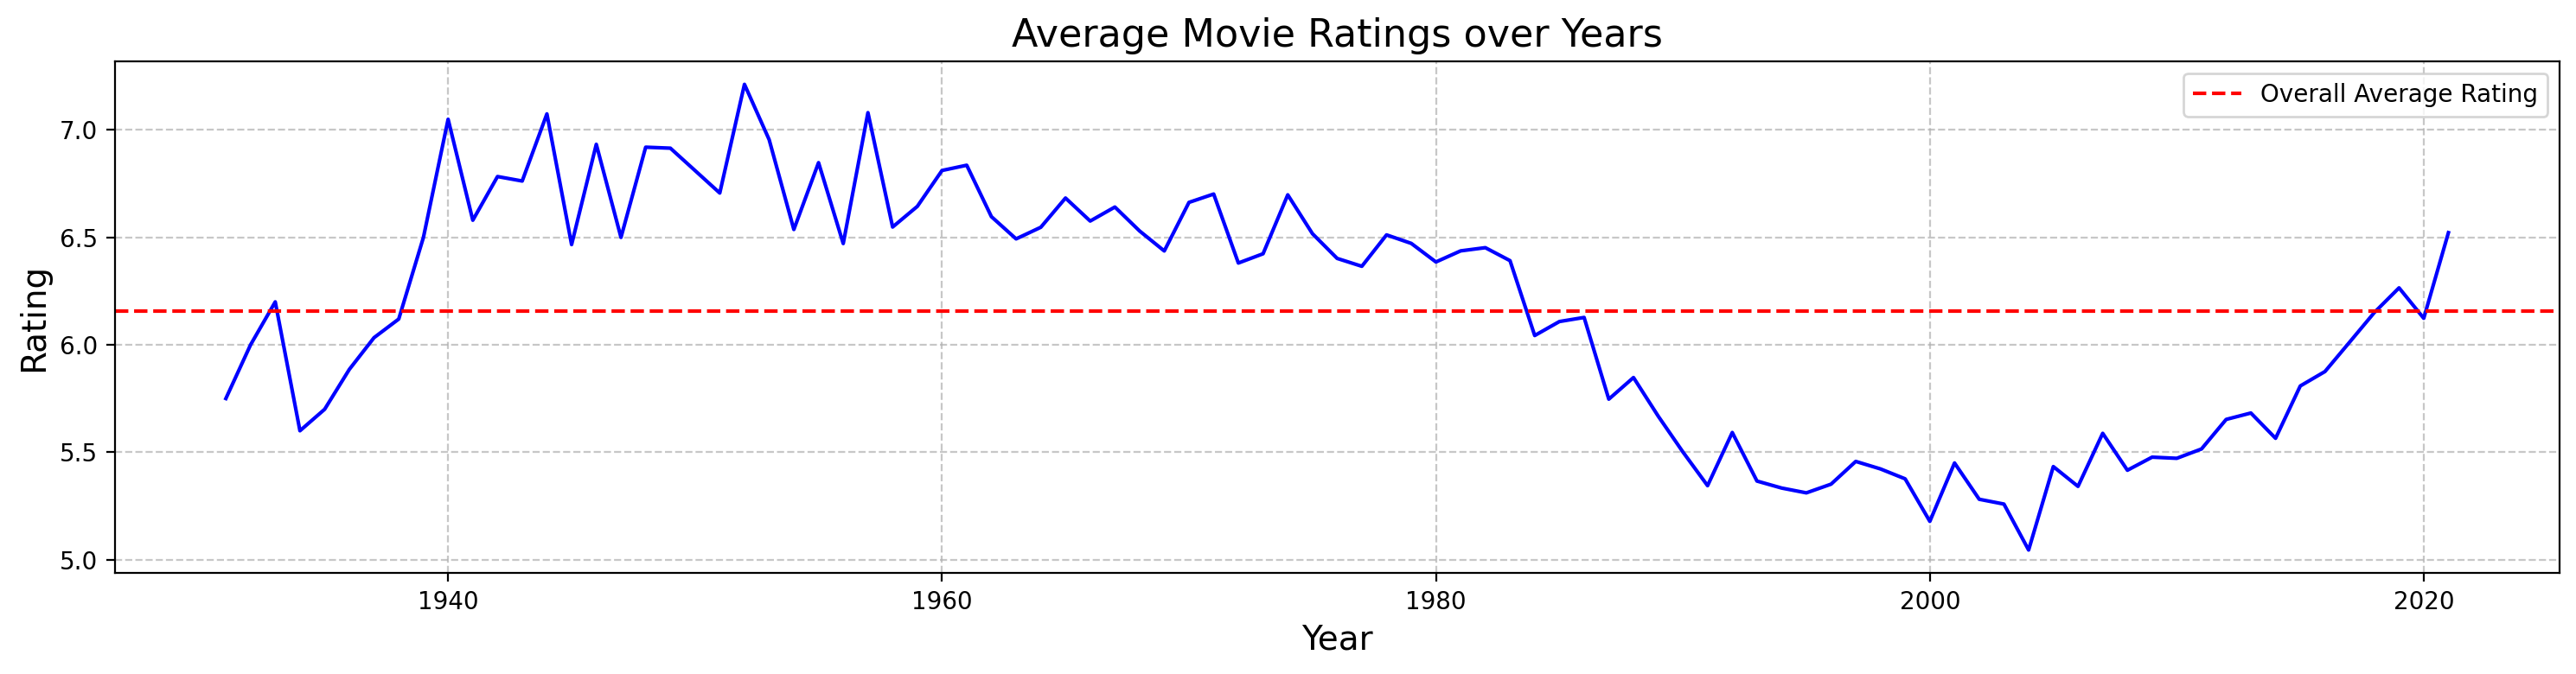

In [26]:
yearly_rating = df.groupby('Year')['Rating'].mean().reset_index()

plt.figure(figsize=(15, 4), dpi = 200)
sns.lineplot(data=yearly_rating, x='Year', y='Rating', color='blue')
plt.title('Average Movie Ratings over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  
plt.grid(True, linestyle='--', alpha=0.7)  
plt.axhline(y=yearly_rating['Rating'].mean(), color='red', linestyle='--', label='Overall Average Rating')  # Add horizontal line for overall average rating
plt.legend()
plt.tight_layout()
plt.show()

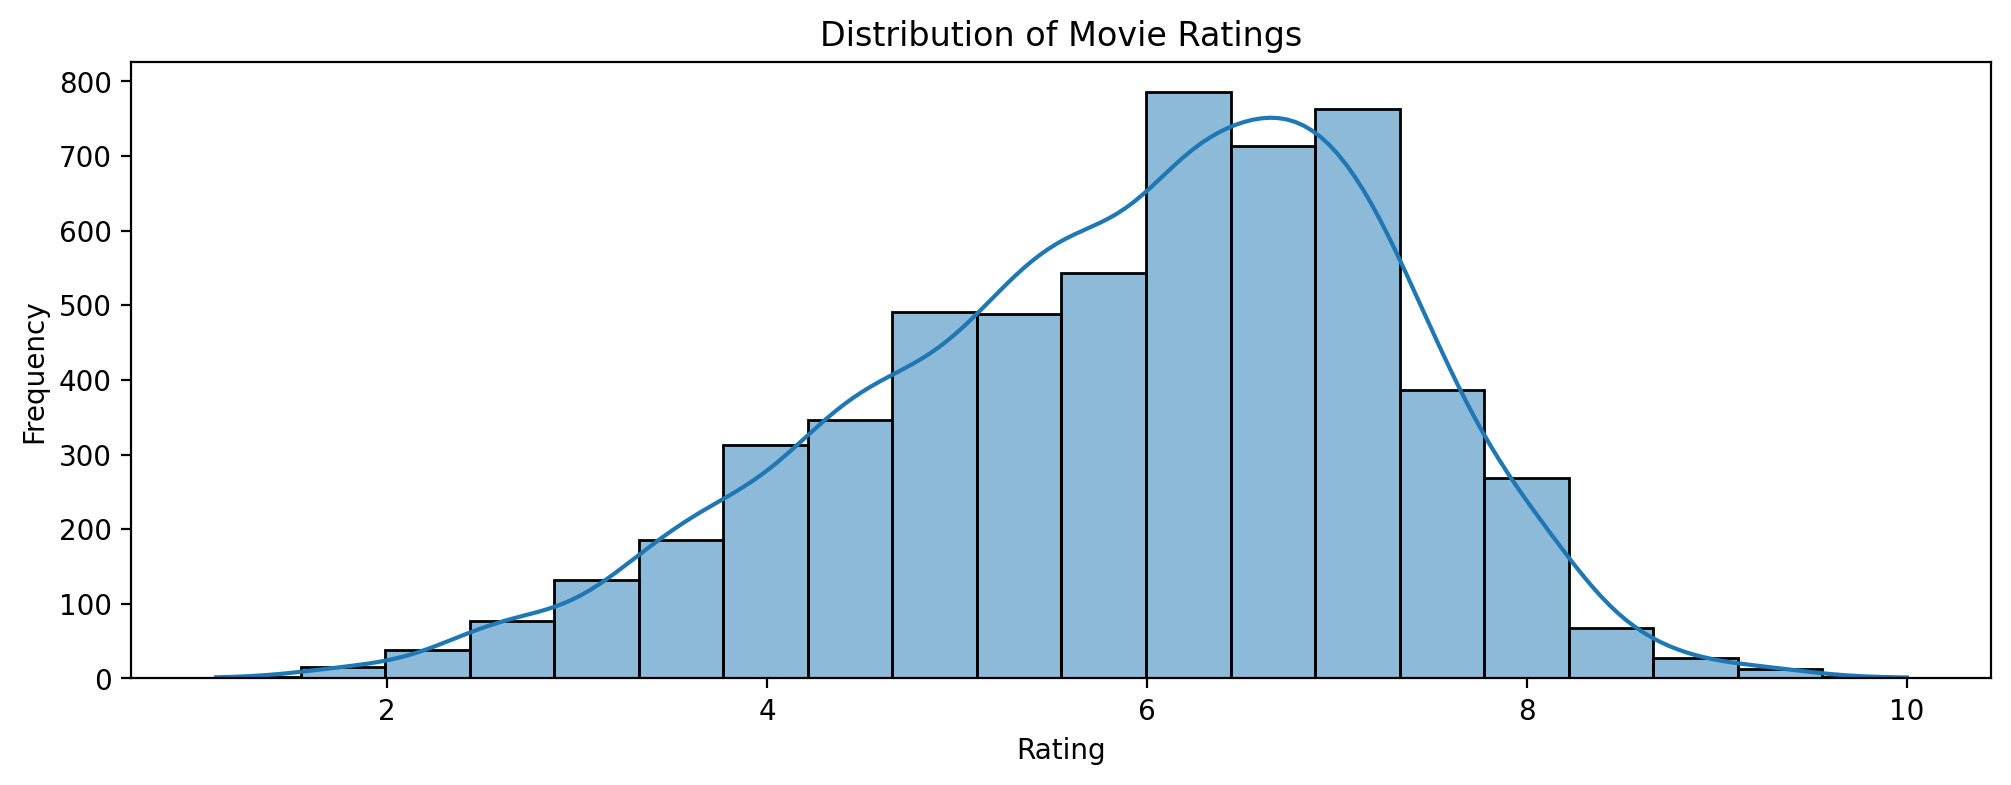

In [27]:
plt.figure(figsize=(12, 4), dpi = 200)
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

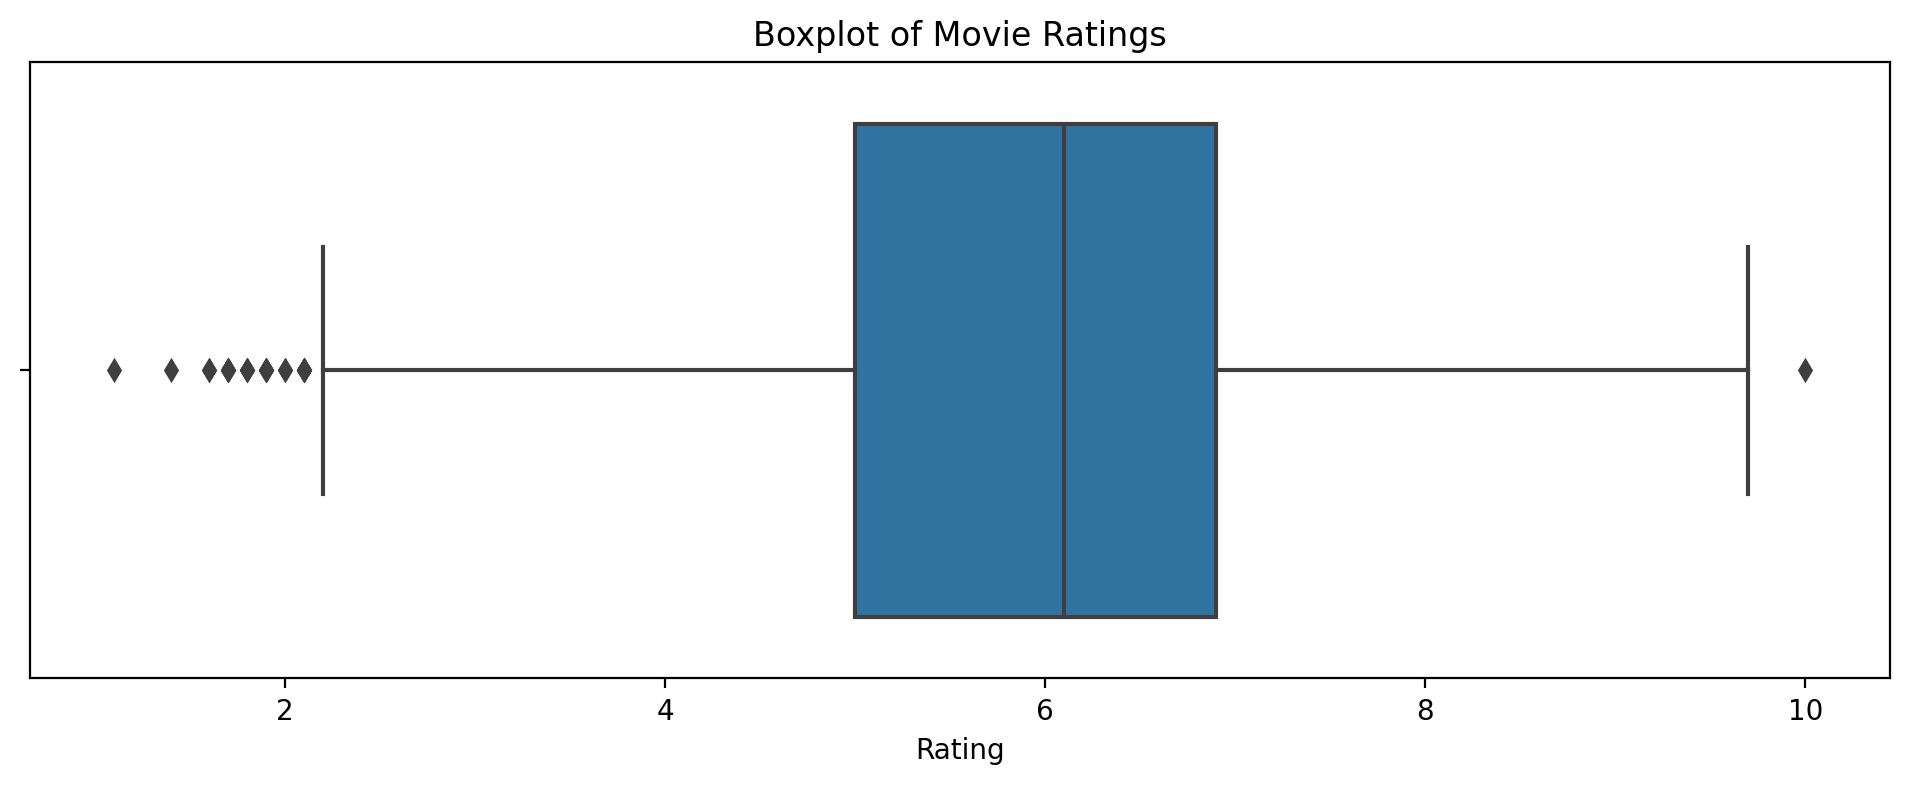

In [28]:
plt.figure(figsize=(12, 4), dpi = 200)
sns.boxplot(x=df['Rating'])
plt.title('Boxplot of Movie Ratings')
plt.xlabel('Rating')
plt.show()

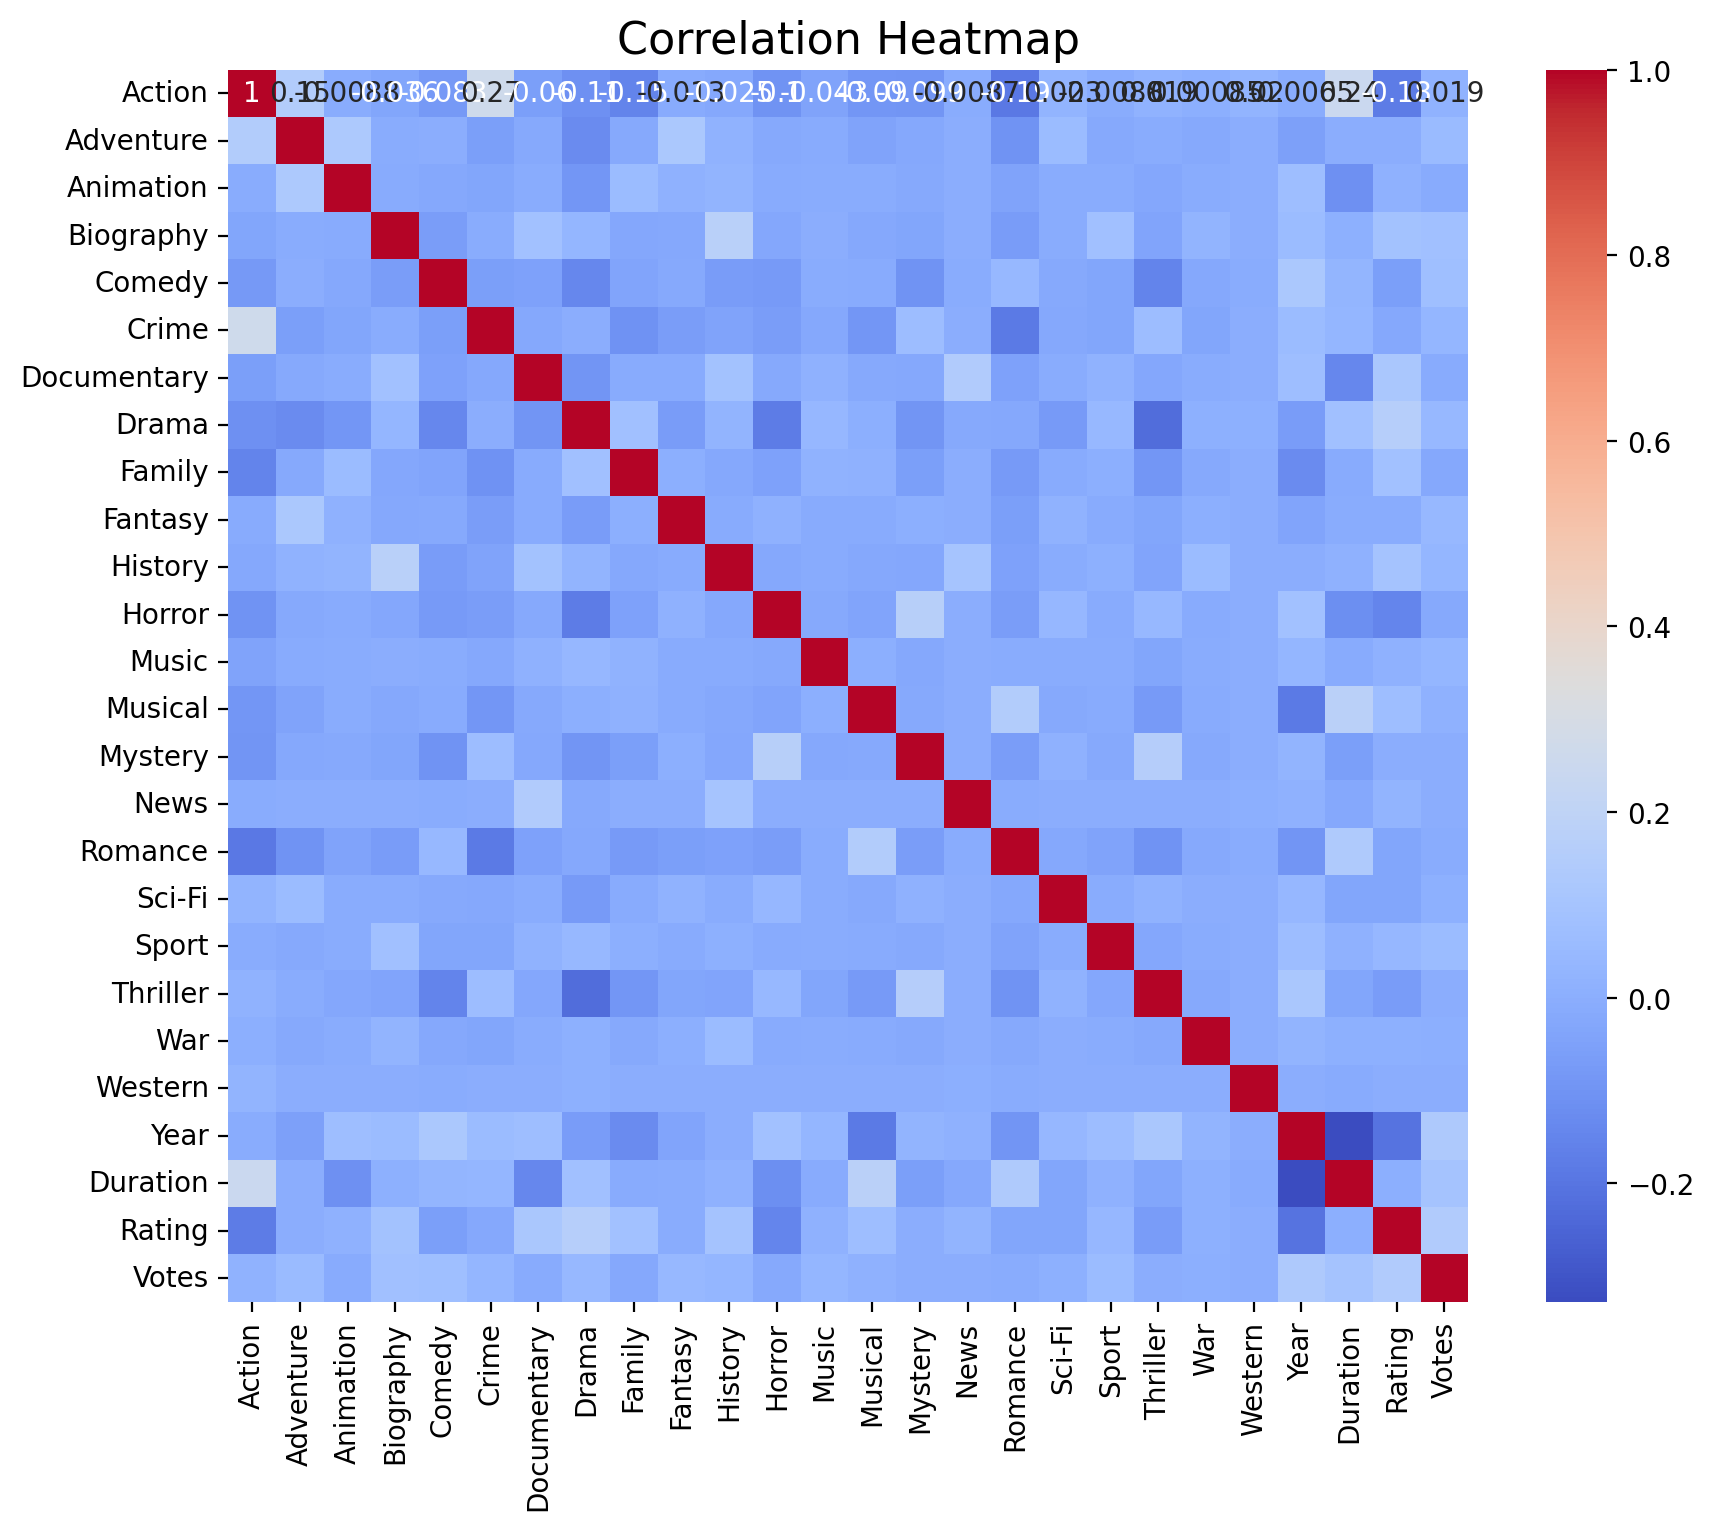

In [29]:
plt.figure(figsize=(10, 8), dpi = 200)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm',)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

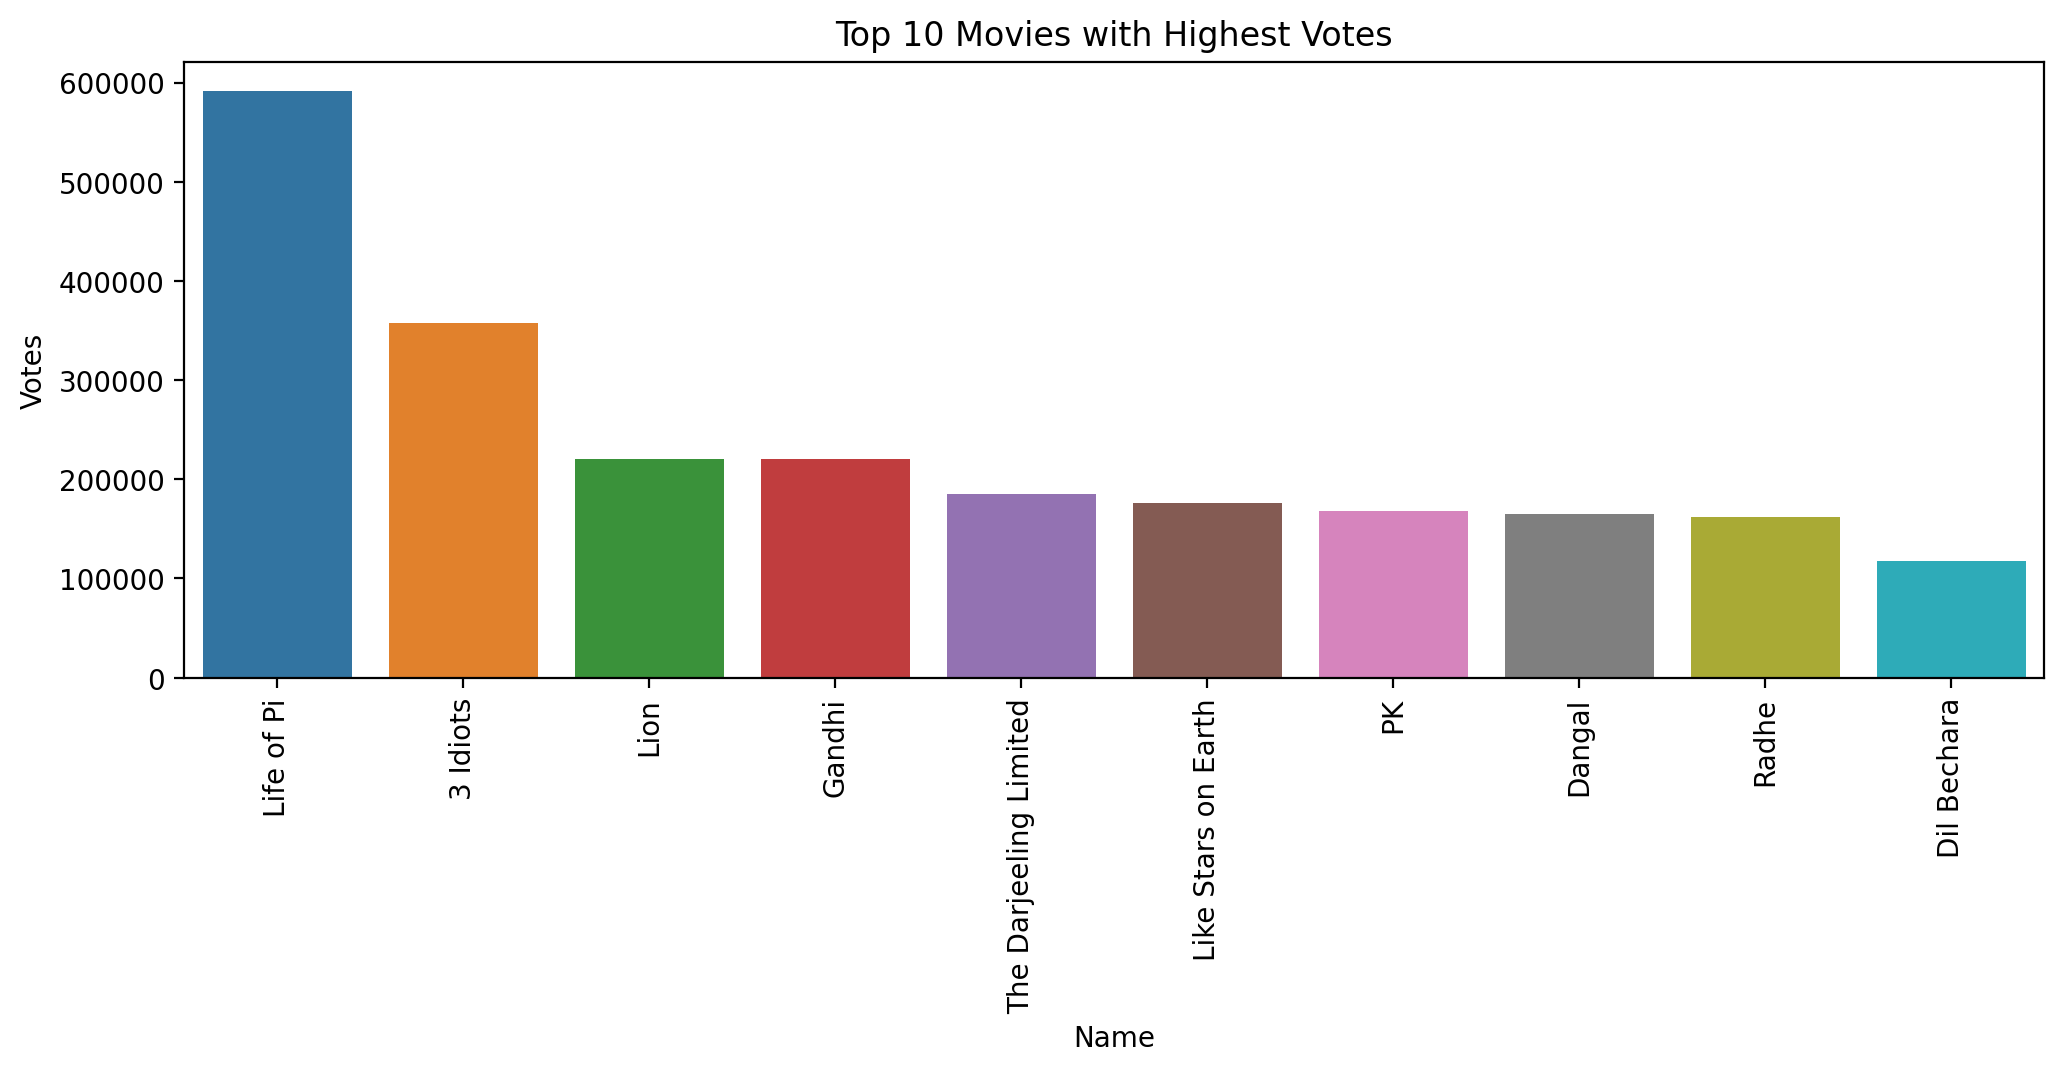

In [30]:
top_10_most_votes = df.nlargest(10,'Votes')[['Name','Votes']]

plt.figure(figsize=(12, 4), dpi = 200)
sns.barplot(data = top_10_most_votes, x = 'Name', y = 'Votes')
plt.title('Top 10 Movies with Highest Votes')

plt.xticks(rotation = 90)
plt.show();

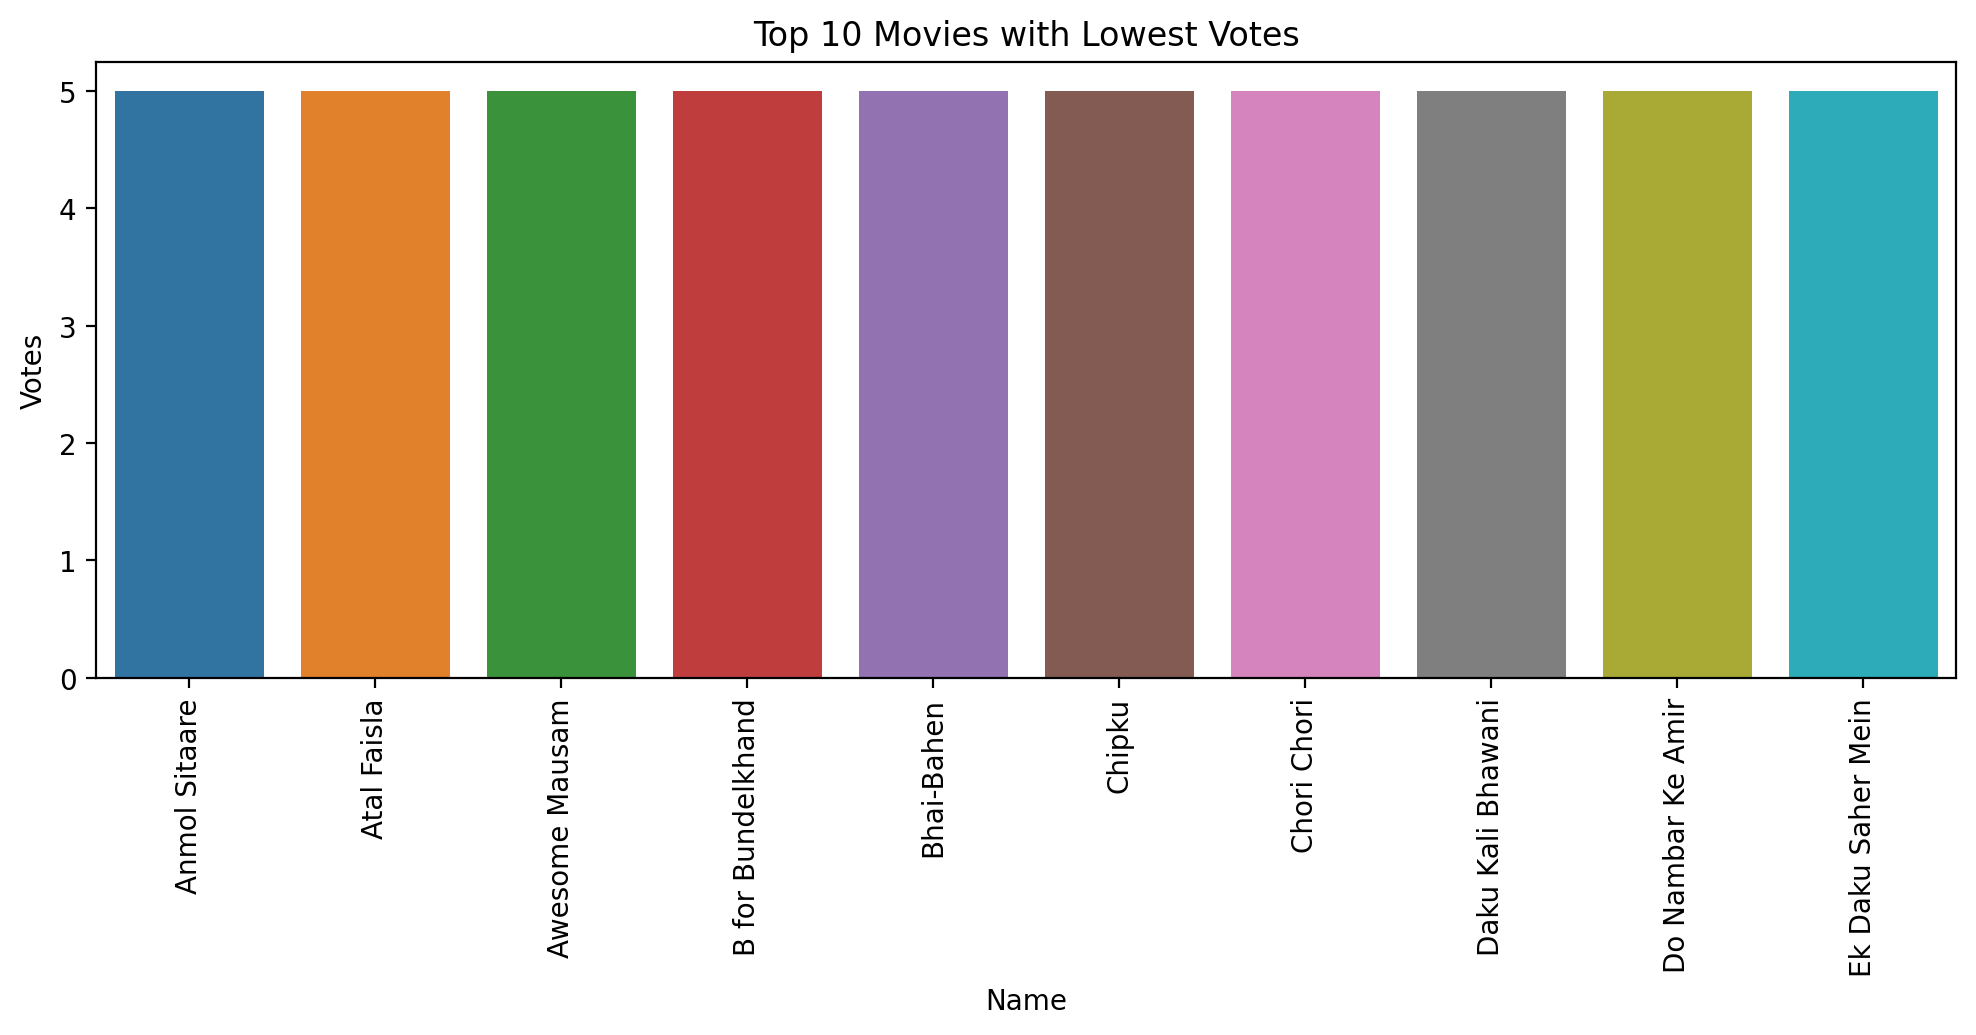

In [31]:
top_10_least_votes = df.nsmallest(10,'Votes')[['Name','Votes']]

plt.figure(figsize=(12, 4), dpi = 200)
sns.barplot(data = top_10_least_votes, x = 'Name', y = 'Votes')
plt.title('Top 10 Movies with Lowest Votes')
plt.xticks(rotation = 90)
plt.show();

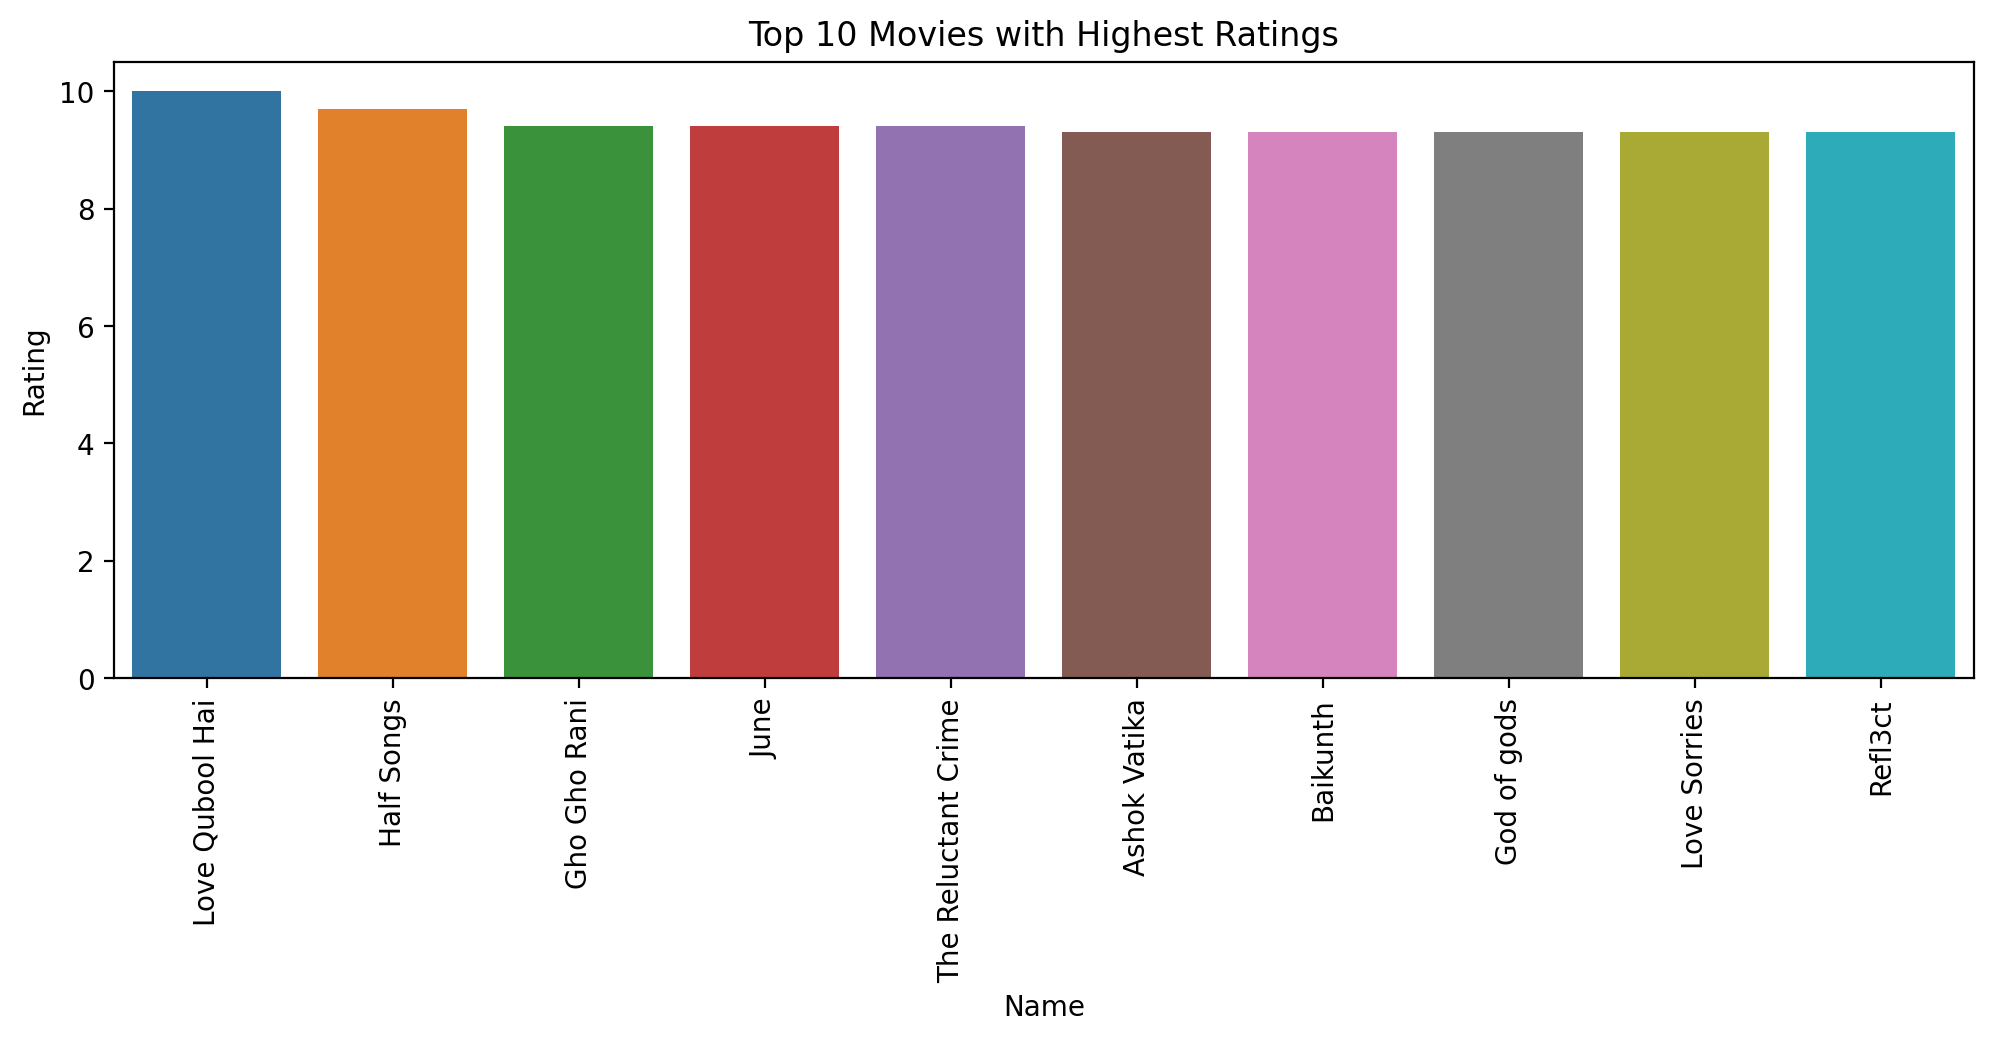

In [32]:
top_10_most_ratings = df.nlargest(10,'Rating')[['Name','Rating']]

plt.figure(figsize=(12, 4), dpi = 200)
sns.barplot(data = top_10_most_ratings, x = 'Name', y = 'Rating')
plt.title('Top 10 Movies with Highest Ratings')
plt.xticks(rotation = 90)
plt.show();

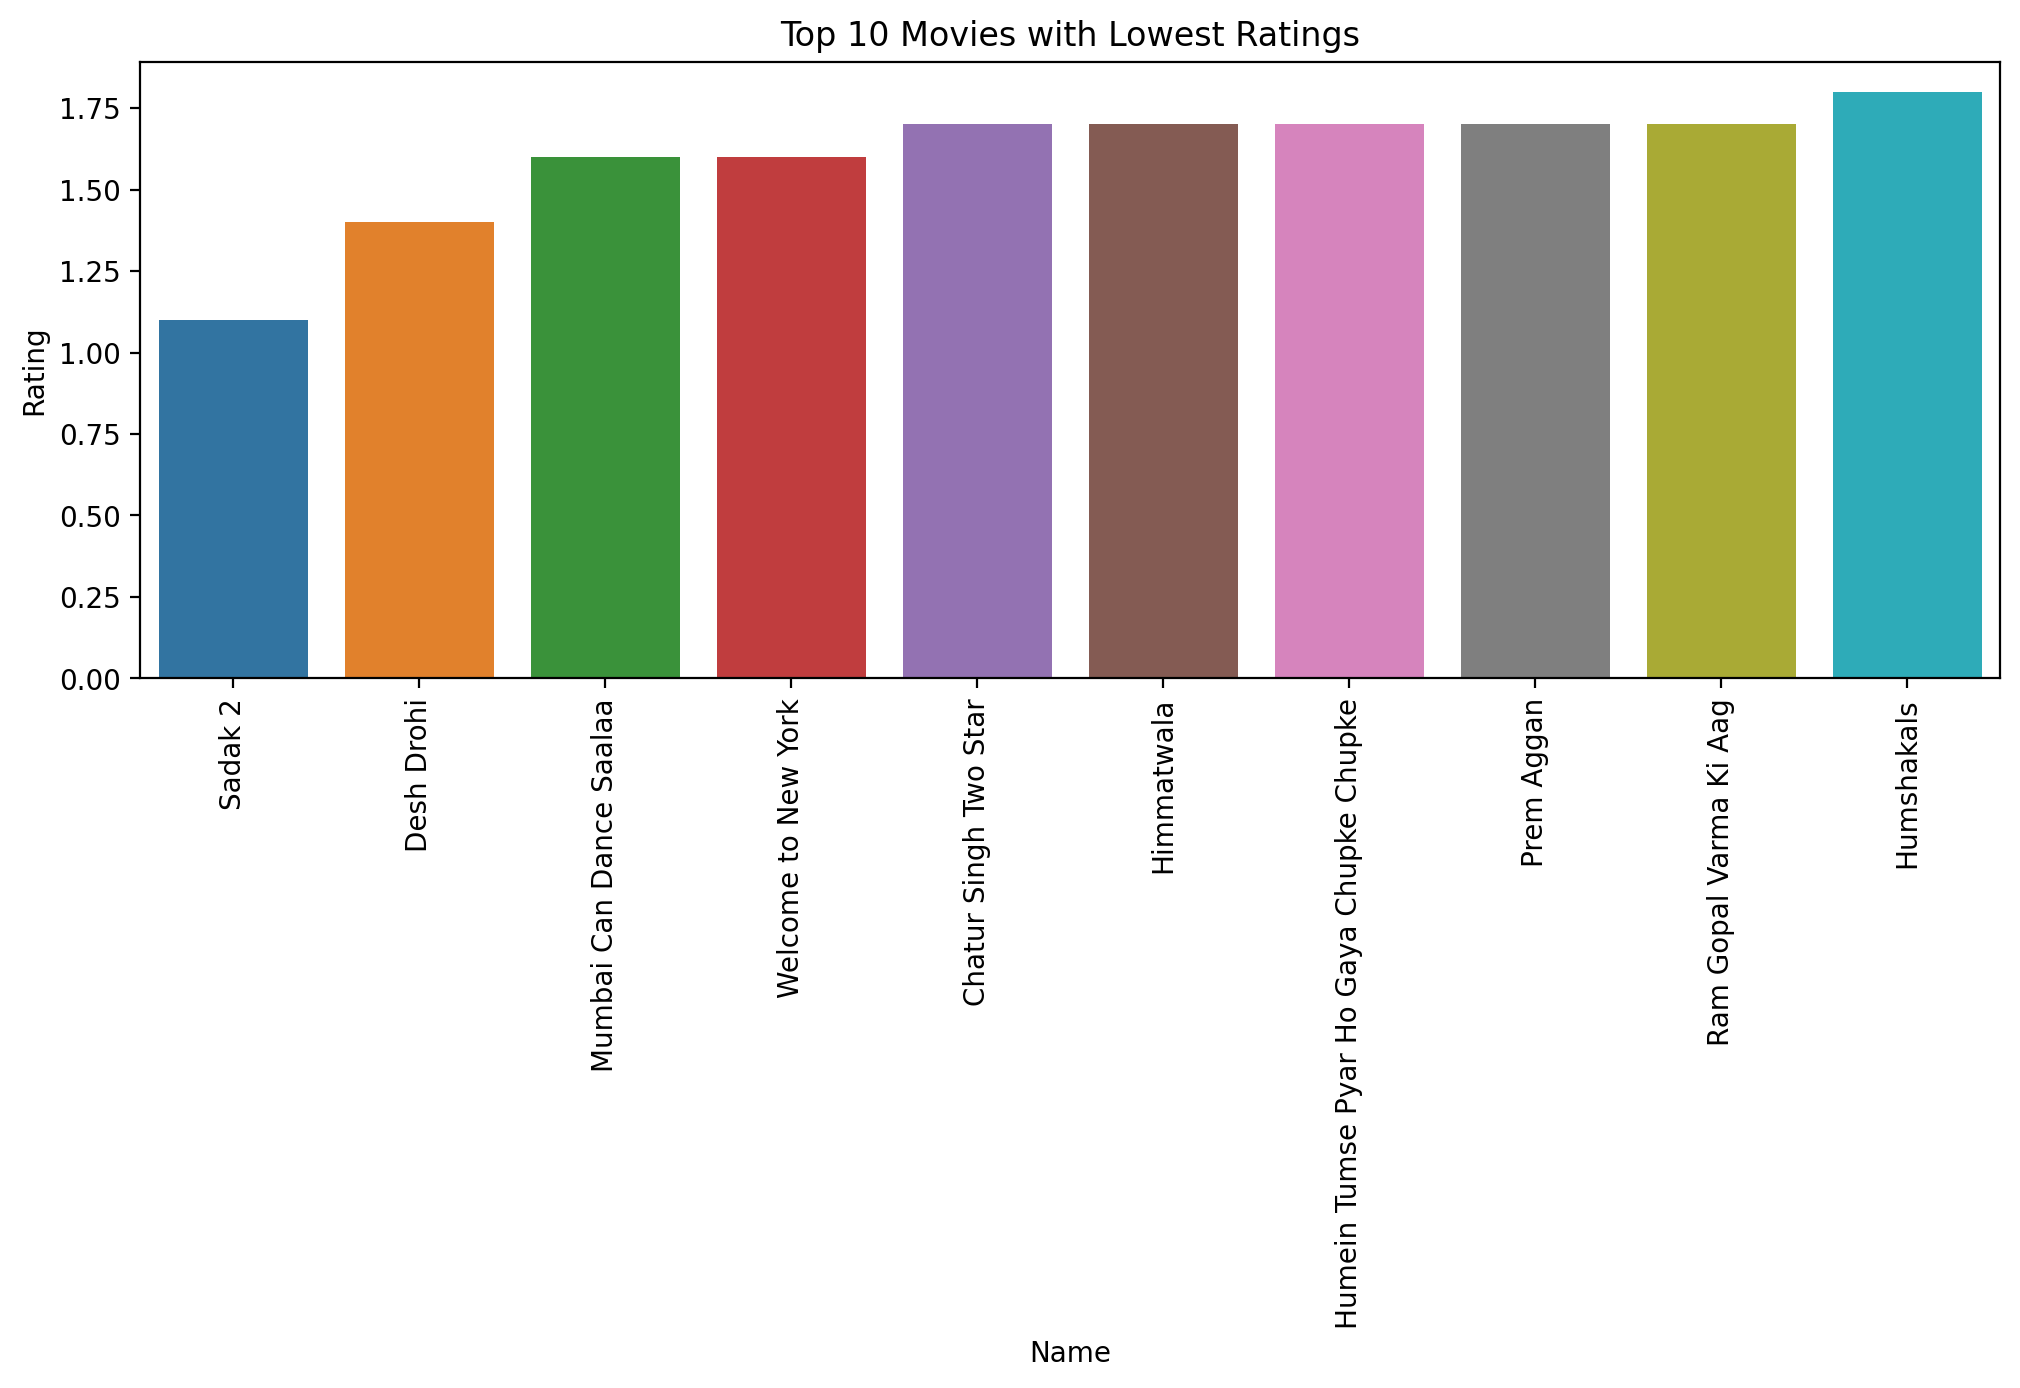

In [33]:
top_10_least_ratings = df.nsmallest(10,'Rating')[['Name','Rating']]

plt.figure(figsize=(12, 4), dpi = 200)
sns.barplot(data = top_10_least_ratings, x = 'Name', y = 'Rating')
plt.title('Top 10 Movies with Lowest Ratings')
plt.xticks(rotation = 90)
plt.show();

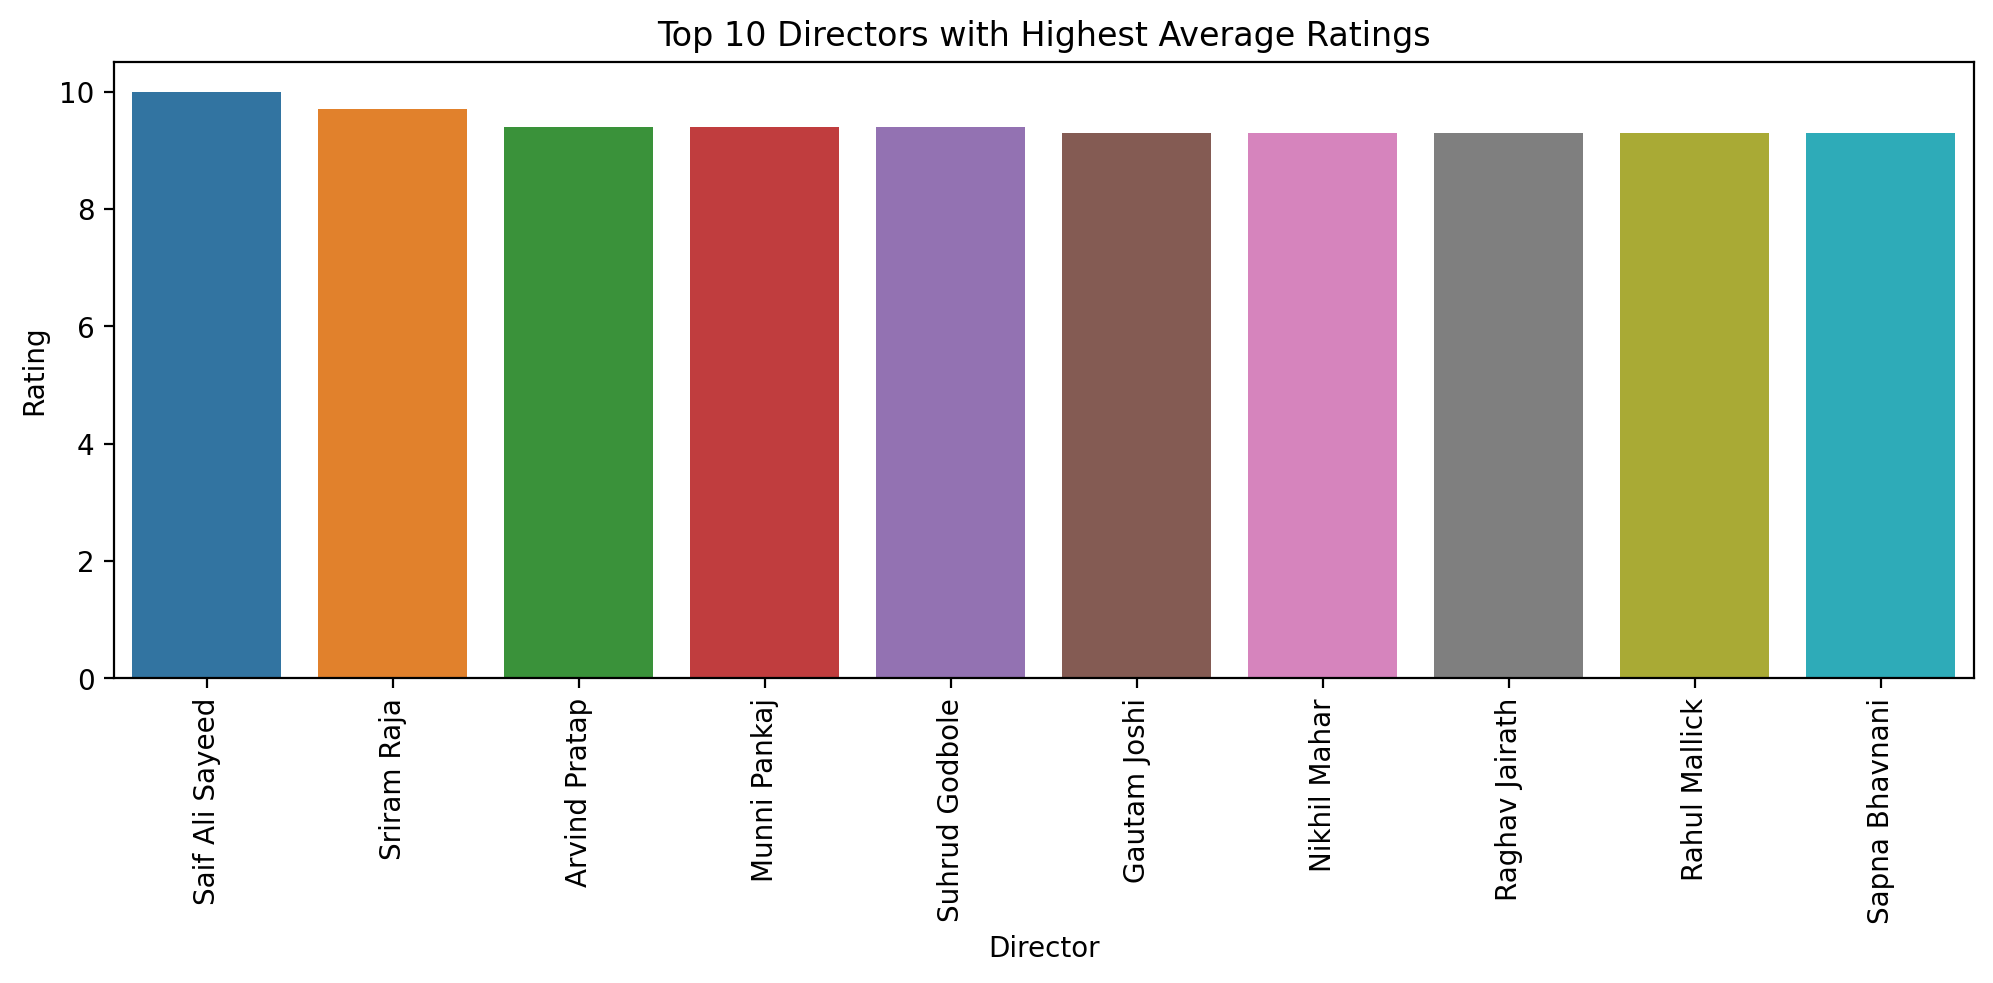

In [34]:
director_avg_rating = df.groupby('Director')['Rating'].mean()
top_10_directors = director_avg_rating.nlargest(10).to_frame().reset_index()

plt.figure(figsize=(12, 4), dpi = 200)
sns.barplot(data = top_10_directors, x = 'Director', y = 'Rating')
plt.title('Top 10 Directors with Highest Average Ratings')
plt.xticks(rotation = 90)
plt.show();

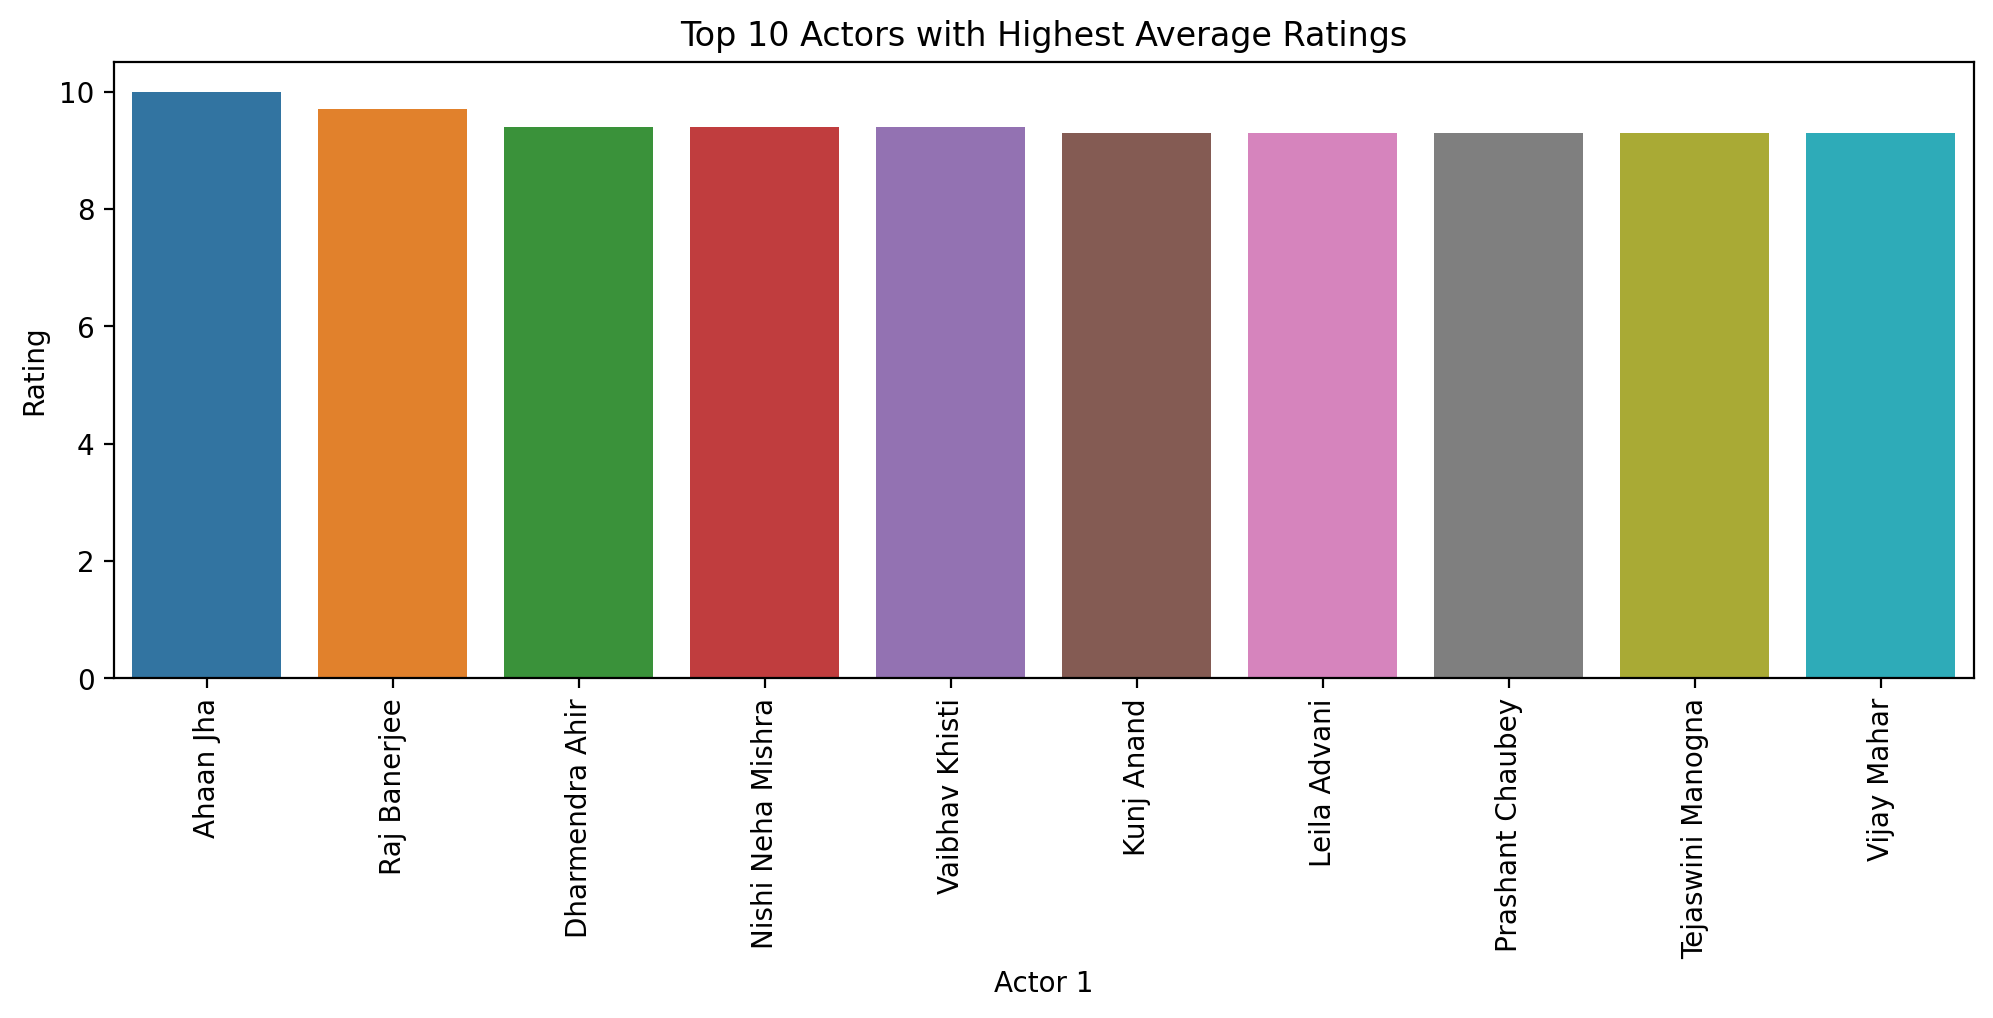

In [35]:
actor_avg_rating = df.groupby('Actor 1')['Rating'].mean()
top_10_actors = actor_avg_rating.nlargest(10).to_frame().reset_index()

plt.figure(figsize=(12, 4), dpi = 200)
sns.barplot(data = top_10_actors, x = 'Actor 1', y = 'Rating')
plt.title('Top 10 Actors with Highest Average Ratings')
plt.xticks(rotation = 90)
plt.show();

### Data Wrangling

#### Encoding

In [36]:
label_encoder = LabelEncoder()

cols_to_convert = ['Name','Director','Actor 1','Actor 2','Actor 3']
for col in cols_to_convert:
    df[col] = label_encoder.fit_transform(df[col])

In [37]:
df.reset_index(inplace=True)

#### Feature Selection

In [38]:
feature_corr = df.corr()['Rating'].sort_values(ascending=False)[1:].reset_index()
features_to_remove = feature_corr[(feature_corr['Rating'] < 0.1) & (feature_corr['Rating'] > -0.1)]
features_to_remove_list = features_to_remove['index'].tolist()

In [39]:
df.drop(features_to_remove_list, axis = 1, inplace = True)

### Model Building

In [40]:
X = df.drop('Rating', axis=1)
y = df['Rating']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
predictions = model.predict(X_test)

In [45]:
def test_model(y_test, predictions):
    mae = mean_absolute_error(y_test, predictions)

    mse = mean_squared_error(y_test, predictions)

    rmse = np.sqrt(mse)

    r2 = r2_score(y_test, predictions)

    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error", rmse)
    print("R-squared:", r2)

In [46]:
test_model(y_test, predictions)

Mean Absolute Error: 0.9774597731087852
Mean Squared Error: 1.5265636176305817
Root Mean Squared Error 1.235541831598826
R-squared: 0.16971761905776128


In [47]:
model = XGBRegressor(objective='reg:squarederror', random_state = 101)

In [48]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [49]:
test_model(y_test, predictions)

Mean Absolute Error: 0.8910102727977631
Mean Squared Error: 1.4027841703708868
Root Mean Squared Error 1.1843918989806064
R-squared: 0.23703999789318042


### Model Deplyment

In [50]:
joblib.dump(model, 'final_model.joblib')

['final_model.joblib']